1. The axis and title of loss landscapes
    - Done, will change from now on

2. missing values in logcosh? 
    - some values in the logcosh contour are zero, meaning zero losses
    - For test_JVASP-14619, the logcosh loss for model index 14,13 is zero, but 2.9995309347441435e-08 for mse and 0.00017319153994321823
    - Could be true, could be too small so python thinks it's zero but actually not

3. set 100 clusters on 100*3 landscapes (leave out RMSE), confirm if the same sample get grouped together

4. use un parametrized unsupervised ML, three times for each loss function, confirm if the clusters match throughout
    - what is in common? what is the mutual information
    - try Hierarchical 
    - visualize dendrogram
    
5. What are other observations, how do we let a computer tell the difference between train and test loss landscapes


Observation:
- the original model lies on the global minimum within the domain of perturbation for the train samples, and the loss is much lower than other models. However, for test samples. the original model is often not the global minimum. Instead, the original model lies in the same valley as the global minimum.
- Steep minima appears to be the case for a lot of train samples
    - how do we tell if we were to let computer do it?



What to featurize?
    - the npy file itself?


The search

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


### Task 1: investigation of why we have transparent pixel in logcosh landscapes.

- some values in the logcosh contour are zero, meaning zero losses
- For test_JVASP-14619, the logcosh loss for model index 14,13 is zero, but 2.9995309347441435e-08 for mse and 0.00017319153994321823
- Could be true, could be too small so python thinks it's zero but actually not

Float32 (Single Precision)
Smallest positive normal: ~1.18e-38
Machine epsilon: ~1.19e-7

might have to verify what is actually going on

logcosh Data shape: (30, 30, 1)
logcosh Missing values present: False
logcosh Indices where loss is zero: [[14 13]]
logcosh Row at index 14: [3.0580445e-03 4.2036511e-03 5.3405948e-03 6.3771089e-03 7.3130298e-03
 8.0465907e-03 8.2126055e-03 7.3581166e-03 5.3526894e-03 3.3433514e-03
 1.8630543e-03 7.2607852e-04 1.7236178e-04 0.0000000e+00 1.4518638e-04
 4.2548662e-04 7.7706180e-04 1.1694743e-03 1.6336204e-03 1.9005347e-03
 1.7776177e-03 1.8115315e-03 1.8843529e-03 1.0521834e-03 3.8211196e-04
 9.2440229e-03 7.7611774e-02 1.8436435e-01 2.6545438e-01 3.3999470e-01]
logcosh entry at index [14, 13]: 0.0


C:\Users\EthanH24\AppData\Local\Temp\ipykernel_2536\742844250.py:42: RuntimeWarning: divide by zero encountered in log10
  log_data = np.log10(data[:, :, 0])


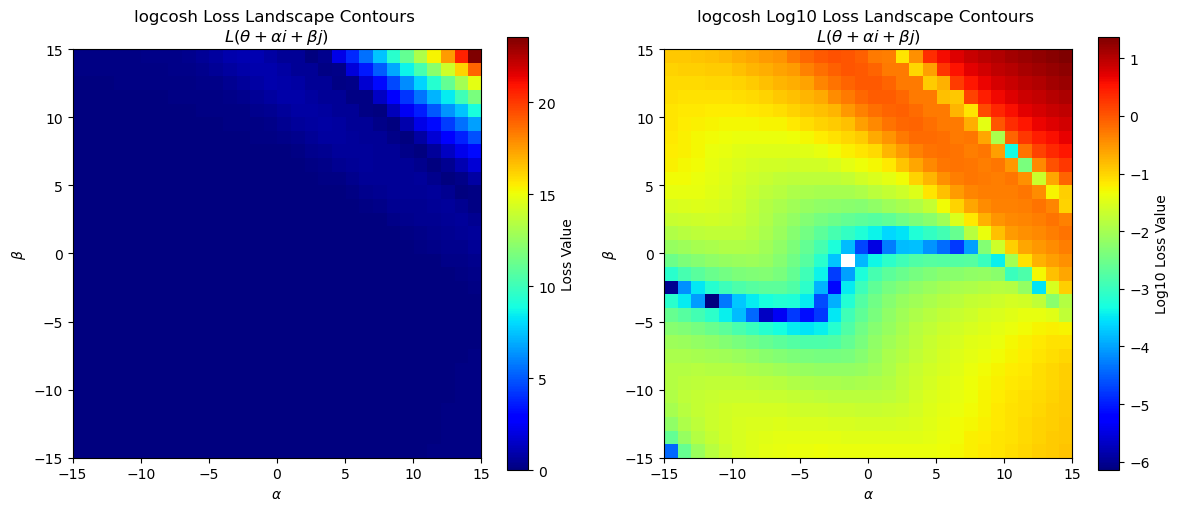

MSE Data shape: (30, 30, 1)
MSE Missing values present: False
MSE Indices where loss is zero: []
MSE Row at index 14: [6.12221006e-03 8.41914862e-03 1.07002351e-02 1.27814021e-02
 1.46618290e-02 1.61364730e-02 1.64702311e-02 1.47525165e-02
 1.07246302e-02 6.69413526e-03 3.72850825e-03 1.45252363e-03
 3.44830594e-04 2.99953093e-08 2.90439930e-04 8.51248158e-04
 1.55449251e-03 2.33983505e-03 3.26911337e-03 3.80353467e-03
 3.55732976e-03 3.62518593e-03 3.77115957e-03 2.10506329e-03
 7.64471130e-04 1.85450371e-02 1.59280702e-01 3.91937912e-01
 5.79514027e-01 7.60451317e-01]
MSE entry at index [14, 13]: 2.9995309347441435e-08


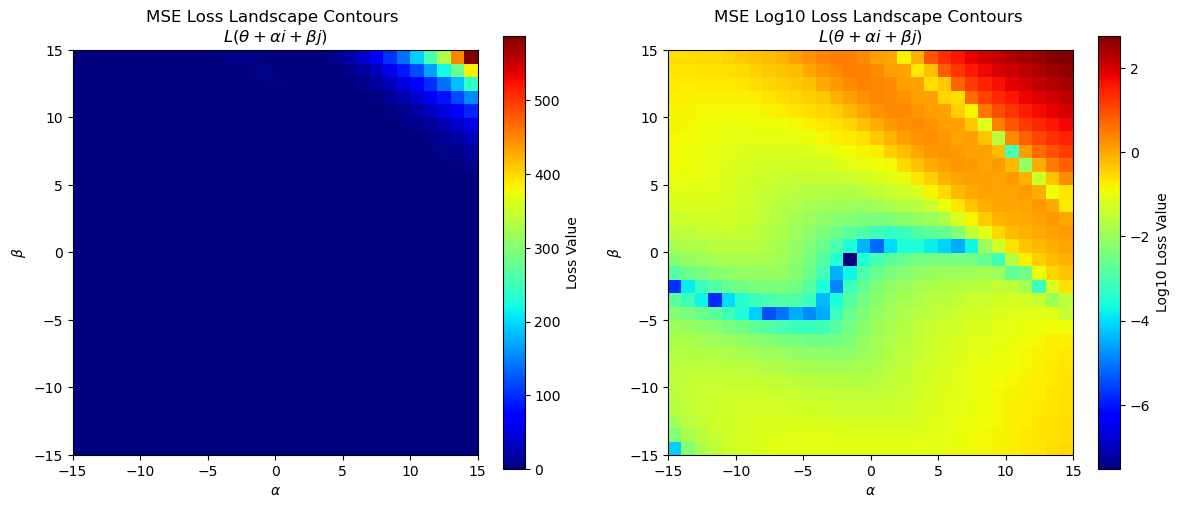

MAE Data shape: (30, 30, 1)
MAE Missing values present: False
MAE Indices where loss is zero: []
MAE Row at index 14: [7.82445520e-02 9.17559192e-02 1.03441939e-01 1.13054864e-01
 1.21086039e-01 1.27029419e-01 1.28336400e-01 1.21459939e-01
 1.03559792e-01 8.18176940e-02 6.10615127e-02 3.81119885e-02
 1.85696147e-02 1.73191540e-04 1.70422979e-02 2.91761570e-02
 3.94270532e-02 4.83718403e-02 5.71761616e-02 6.16728030e-02
 5.96433543e-02 6.02095164e-02 6.14097677e-02 4.58809696e-02
 2.76490711e-02 1.36180162e-01 3.99099857e-01 6.26049459e-01
 7.61258185e-01 8.72038603e-01]
MAE entry at index [14, 13]: 0.00017319153994321823


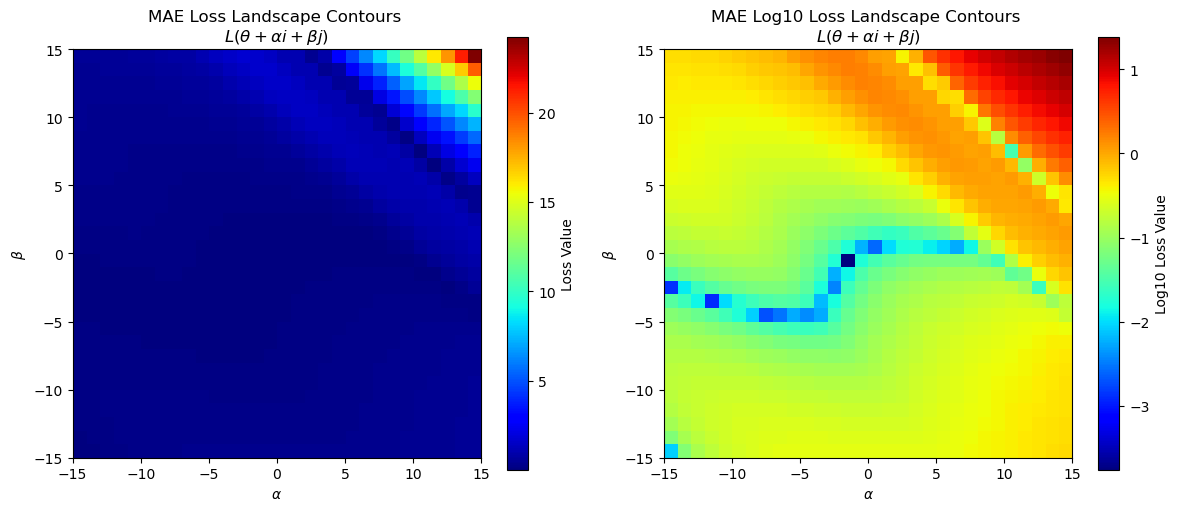

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data = np.load(r'outputs\output_20250310_005029_logcosh_centered\test_JVASP-14619\test_JVASP-14619_loss_landscape_array.npy')
data_mse = np.load(r'outputs\output_20250309_002541_MSE_centered\test_JVASP-14619\test_JVASP-14619_loss_landscape_array.npy')
data_mae = np.load(r'outputs\output_20250309_215548_MAE_centered\test_JVASP-14619\test_JVASP-14619_loss_landscape_array.npy')

# Function to process and visualize data
def process_and_visualize(data, title_prefix):
    # Check for missing values in the array
    missing_values = np.isnan(data).any()

    # Find where the loss is zero
    zero_loss_indices = np.argwhere(data[:, :, 0] == 0)

    # Inspect the data
    print(f"{title_prefix} Data shape:", data.shape)
    print(f"{title_prefix} Missing values present:", missing_values)
    print(f"{title_prefix} Indices where loss is zero:", zero_loss_indices)

    # Display specific zero loss index and its corresponding row
    specific_index = [14, 13]
    print(f"{title_prefix} Row at index {specific_index[0]}: {data[specific_index[0], :, 0]}")
    print(f"{title_prefix} entry at index {specific_index}: {data[specific_index[0], specific_index[1], 0]}")

    # Visualize the data as a 2D contour plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Adjust the extent to relocate the coordinate system
    extent = [-15, data.shape[1] - 15, -15, data.shape[0] - 15]

    # Original data contour
    ax[0].imshow(data[:, :, 0], cmap='jet', origin='lower', extent=extent)
    ax[0].set_title(f'{title_prefix} Loss Landscape Contours \n'+ r'$L(\theta + \alpha i + \beta j$)')
    ax[0].set_xlabel(r'$\alpha$')
    ax[0].set_ylabel(r'$\beta$')
    plt.colorbar(ax[0].imshow(data[:, :, 0], cmap='jet', origin='lower', extent=extent), ax=ax[0], label='Loss Value')

    # Log10 transformed data contour
    # log_data = np.log10(data[:, :, 0] + 1e-10)  # Adding a small value to avoid log(0)
    log_data = np.log10(data[:, :, 0])

    ax[1].imshow(log_data, cmap='jet', origin='lower', extent=extent)
    ax[1].set_title(f'{title_prefix} Log10 Loss Landscape Contours \n'+ r'$L(\theta + \alpha i + \beta j$)')
    ax[1].set_xlabel(r'$\alpha$')
    ax[1].set_ylabel(r'$\beta$')
    plt.colorbar(ax[1].imshow(log_data, cmap='jet', origin='lower', extent=extent), ax=ax[1], label='Log10 Loss Value')

    plt.tight_layout()
    plt.show()

# Process and visualize each dataset
process_and_visualize(data, "logcosh")
process_and_visualize(data_mse, "MSE")
process_and_visualize(data_mae, "MAE")

### Task 2: Investigation into if 100 clusters form correctly

Summary:
Obtained loss landscapes for 100 samples from 3 loss functions, logcosh, mse, and mae.

The npy array for each loss landscape is flattened to a 900 unit array.

Then, for each landscape's 900 length array, a standard scaler is applied.

The landscapes are stacked to be a 300*900 array, which PCA is applied to. 

It is noticeable that PC1 takes up to 0.8 explained variance.

The composition of that PC is a mixture of all 900 features, however, some pixel do stand out from others. 

Feature 897: 0.07620223611593246
Feature 898: 0.15935970842838287
Feature 899: 0.26511016488075256
Feature 900: 0.39607834815979004

30 PCs are left for K-means clustering with 100 clusters set.

To rule out randomness of k-means, 100 experiments are conducted on different random seeds. Some samples frequently have their logcosh and mae landscapes clustered together, whereas other combinations did not appear. 

These samples are 

['test_JVASP-22556', 'test_JVASP-38314', 'test_JVASP-42398', 'test_JVASP-42657', 'test_JVASP-42660', 'test_JVASP-43030', 'test_JVASP-43739', 'test_JVASP-44082', 'test_JVASP-47532', 'test_JVASP-47765', 'test_JVASP-47772', 'test_JVASP-47963', 'test_JVASP-48101', 'test_JVASP-64061', 'test_JVASP-87334', 'test_JVASP-90532', 'test_JVASP-97343', 'test_JVASP-97344', 'train_JVASP-13907', 'train_JVASP-36850', 'train_JVASP-39364', 'train_JVASP-48579', 'train_JVASP-48645', 'train_JVASP-49779', 'train_JVASP-50811', 'train_JVASP-64616', 'train_JVASP-85930', 'train_JVASP-97442', 'train_JVASP-97576', 'train_JVASP-97636', 'train_JVASP-97814', 'train_JVASP-97929', 'train_JVASP-98239', 'train_JVASP-98448', 'train_JVASP-98452', 'test_JVASP-43740', 'train_JVASP-22645', 'train_JVASP-89269', 'test_JVASP-47769', 'test_JVASP-89265']

Why are mae and mse not clustered together? but logcosh and mae are?
My hypothesis:
1. logcosh and mae behaves approximately linearly for bigger values, 
2. so the standardization plays a different effect on mse than on mae and logcosh
2. k means also uses euclidean distance to make clusters, the mse loss landscapes may not be easily handled by k means?

Next step: 
1. mutual information
2. manually check the sample information? read csv

In [3]:
# This code loads loss landscape data for different loss functions, performs K-means clustering on the combined data, 
# and outputs the clustering results, including the number of samples in each cluster.

import os
import numpy as np

# Define the base directories for each type of loss function. These directories contain the data files.
folders = {
    'logcosh': r'outputs\output_20250310_005029_logcosh_centered',
    'mse': r'outputs\output_20250309_002541_MSE_centered',
    'mae': r'outputs\output_20250309_215548_MAE_centered'
}

# Retrieve all sample names from the 'logcosh' folder. It is assumed that all folders have the same subfolder names.
sample_names = [name for name in os.listdir(folders['logcosh']) if os.path.isdir(os.path.join(folders['logcosh'], name))]

def get_loss_landscape_path(loss_type, sample_name):
    """
    Constructs the file path to the loss landscape array for a specified loss type and sample name.

    :param loss_type: The type of loss function ('logcosh', 'mse', 'mae').
    :param sample_name: The name of the sample (e.g., 'test_JVASP-14619').
    :return: The complete file path to the loss landscape array.
    """
    if loss_type not in folders:
        raise ValueError(f"Invalid loss type: {loss_type}. Choose from 'logcosh', 'mse', 'mae'.")
    if sample_name not in sample_names:
        raise ValueError(f"Invalid sample name: {sample_name}.")
    
    return os.path.join(folders[loss_type], sample_name, f"{sample_name}_loss_landscape_array.npy")

def get_sample_data_path(loss_type, sample_name):
    """
    Constructs the file path to the sample data file for a specified loss type and sample name.

    :param loss_type: The type of loss function ('logcosh', 'mse', 'mae').
    :param sample_name: The name of the sample (e.g., 'test_JVASP-14619').
    :return: The complete file path to the sample data file.
    """
    if loss_type not in folders:
        raise ValueError(f"Invalid loss type: {loss_type}. Choose from 'logcosh', 'mse', 'mae'.")
    if sample_name not in sample_names:
        raise ValueError(f"Invalid sample name: {sample_name}.")
    
    return os.path.join(folders[loss_type], sample_name, f"{sample_name}sample_data.csv")

# Initialize lists to store the loss landscapes for each loss function type
logcosh_landscapes = []
mse_landscapes = []
mae_landscapes = []

# Load the loss landscape data for each sample and append it to the respective list
for sample_name in sample_names:
    logcosh_path = os.path.join(folders['logcosh'], sample_name, f"{sample_name}_loss_landscape_array.npy")
    mse_path = os.path.join(folders['mse'], sample_name, f"{sample_name}_loss_landscape_array.npy")
    mae_path = os.path.join(folders['mae'], sample_name, f"{sample_name}_loss_landscape_array.npy")
    
    logcosh_landscapes.append(np.load(logcosh_path))
    mse_landscapes.append(np.load(mse_path))
    mae_landscapes.append(np.load(mae_path))

# Convert the lists of landscapes into numpy arrays for easier manipulation
logcosh_landscapes = np.array(logcosh_landscapes)
mse_landscapes = np.array(mse_landscapes)
mae_landscapes = np.array(mae_landscapes)

# Print the shapes of the loaded landscape arrays to verify their dimensions
print("logcosh_landscapes shape:", logcosh_landscapes.shape)
print("mse_landscapes shape:", mse_landscapes.shape)
print("mae_landscapes shape:", mae_landscapes.shape)

# Combine all the landscape arrays into a single array for clustering
all_landscapes = np.concatenate((logcosh_landscapes, mse_landscapes, mae_landscapes), axis=0)
print(all_landscapes.shape)


logcosh_landscapes shape: (100, 30, 30, 1)
mse_landscapes shape: (100, 30, 30, 1)
mae_landscapes shape: (100, 30, 30, 1)
(300, 30, 30, 1)


flattened_landscapes shape: (300, 900)


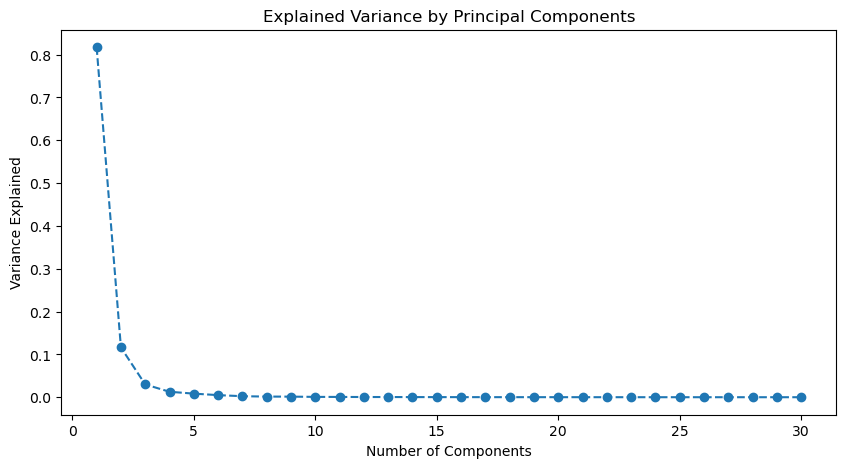

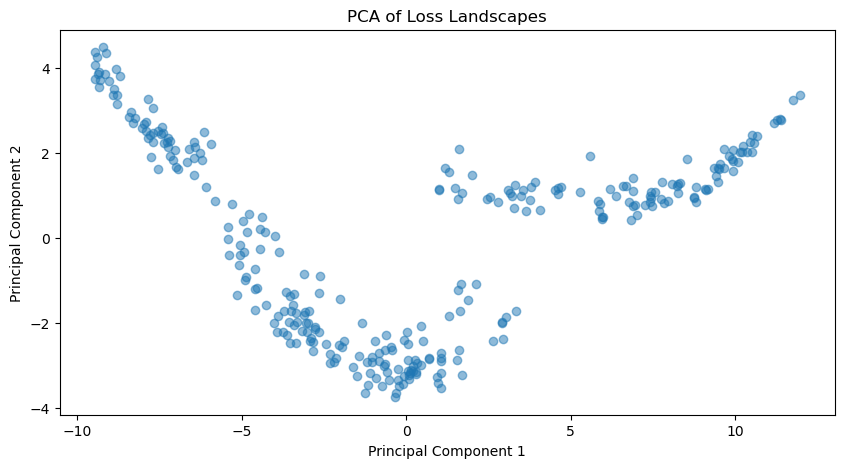

Composition of PCA1:
Feature 1: 0.004365342669188976
Feature 2: 0.004703524988144636
Feature 3: 0.004992709960788488
Feature 4: 0.005240441299974918
Feature 5: 0.005444933194667101
Feature 6: 0.0056091127917170525
Feature 7: 0.005737015977501869
Feature 8: 0.005832036957144737
Feature 9: 0.005898640491068363
Feature 10: 0.005942283198237419
Feature 11: 0.00596760306507349
Feature 12: 0.0059794033877551556
Feature 13: 0.005982531234622002
Feature 14: 0.005979891866445541
Feature 15: 0.005971735343337059
Feature 16: 0.005957748740911484
Feature 17: 0.005937635432928801
Feature 18: 0.0059062116779387
Feature 19: 0.005849932786077261
Feature 20: 0.005745374597609043
Feature 21: 0.005573376547545195
Feature 22: 0.005320558790117502
Feature 23: 0.004967232700437307
Feature 24: 0.004471374675631523
Feature 25: 0.003780943574383855
Feature 26: 0.002880565822124481
Feature 27: 0.0017370209097862244
Feature 28: 0.0002782491210382432
Feature 29: -0.0014791577123105526
Feature 30: -0.0035151469055

In [4]:
#trial 1-----------------------------------------------------------------------

# 1. Rescale each row of the flattened loss landscapes before clustering
# 2. PCA
# 3. visualize the PCA
# 4. K-means clustering
# 5. visualize the clustering


# Rescale each row of the flattened loss landscapes before clustering
from sklearn.preprocessing import StandardScaler

# Flatten the all_landscapes array for scaling
flattened_landscapes = all_landscapes.reshape(all_landscapes.shape[0], -1)
print("flattened_landscapes shape:", flattened_landscapes.shape)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the flattened landscapes
scaler = StandardScaler()
scaled_landscapes = scaler.fit_transform(flattened_landscapes.T).T
#scaled_landscapes = scaler.fit_transform(flattened_landscapes)


# Apply PCA
pca = PCA(n_components=30)
pca_result = pca.fit_transform(scaled_landscapes)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

# Visualize the dimension-reduced plot (first two principal components)
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA of Loss Landscapes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print the composition of the first principal component
pca1_composition = pca.components_[0]
print("Composition of PCA1:")
for i, value in enumerate(pca1_composition):
    print(f"Feature {i+1}: {value}")


PCA results shape: (300, 30)
PCA Cluster centers shape: (100, 30)
PCA Labels shape: (300,)
PCA Cluster labels: [ 8 74 74  7 73 59 46 46 59 59 24 81 49 76 42 84 53 42 42 75 89 23 23 26
 89 84 44 18 93 50 71  9 24 34  8 10 94 34 27 69 24 10 26 24 94 17 62 58
 59 22 55 61 64  2 41 35 98 16 94 16 14 14 12  1 85 57 22 71 22 71 18 22
 56 18 18 39 46 41 22 79 12 57 10 10 86 57 12 73 22  3 63 84 83  3 10 57
  3 21  3 16 25 25 25  4 19 80 90 30 37 37 70 54 96 54 97  4 67 29 29 38
 67 67 67 78  4  4 54 45 11  6  6  6 70 51 25 80 80 51 38 67 19 70 31 37
 70  0 28 31 80 11 97 90 37 80 91 45  0 38 70 38  4  4 45 31 78 30 11  6
 45 45  6 11 45 11  6 54 90 38 11  4 45 30 19 80 28 90 45 90 11 28 13 67
 78 29 19 19 29 78 29 38 47 33 33  7  5  5 40 40 48 48 43 81 49 76 55 32
 53 55 42 75 89 69 23 26 84 32 44  9 93 50  9 65 99 20 47 95 66 20 27 69
 95 61 26 92 52 52 62 58 73 56 55 77 66  2 68 35 98 16 87 16 14 14 15  1
 85 72 56  9 56  9 65 56 71  9  9 39 88 68 60 79 15 36 95 95 86 72 15 82
 12  3 63 32 

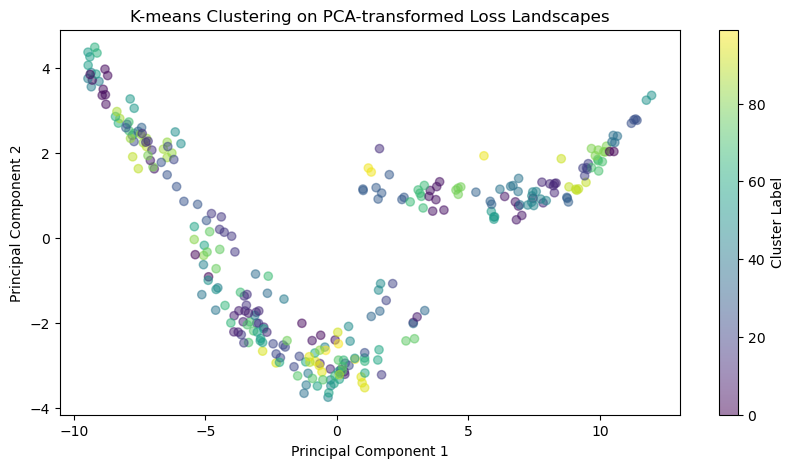

Reshaped PCA Labels (3 rows, 100 columns):
Loss Function 1: [ 8 74 74  7 73 59 46 46 59 59 24 81 49 76 42 84 53 42 42 75 89 23 23 26
 89 84 44 18 93 50 71  9 24 34  8 10 94 34 27 69 24 10 26 24 94 17 62 58
 59 22 55 61 64  2 41 35 98 16 94 16 14 14 12  1 85 57 22 71 22 71 18 22
 56 18 18 39 46 41 22 79 12 57 10 10 86 57 12 73 22  3 63 84 83  3 10 57
  3 21  3 16]
Loss Function 2: [25 25 25  4 19 80 90 30 37 37 70 54 96 54 97  4 67 29 29 38 67 67 67 78
  4  4 54 45 11  6  6  6 70 51 25 80 80 51 38 67 19 70 31 37 70  0 28 31
 80 11 97 90 37 80 91 45  0 38 70 38  4  4 45 31 78 30 11  6 45 45  6 11
 45 11  6 54 90 38 11  4 45 30 19 80 28 90 45 90 11 28 13 67 78 29 19 19
 29 78 29 38]
Loss Function 3: [47 33 33  7  5  5 40 40 48 48 43 81 49 76 55 32 53 55 42 75 89 69 23 26
 84 32 44  9 93 50  9 65 99 20 47 95 66 20 27 69 95 61 26 92 52 52 62 58
 73 56 55 77 66  2 68 35 98 16 87 16 14 14 15  1 85 72 56  9 56  9 65 56
 71  9  9 39 88 68 60 79 15 36 95 95 86 72 15 82 12  3 63 32 83  3 22 72
  

In [5]:
from sklearn.cluster import KMeans

# Print the shape of the PCA results
print("PCA results shape:", pca_result.shape)

# Perform K-means clustering on the PCA-transformed data with 100 clusters
kmeans_pca = KMeans(n_clusters=100, random_state=None, max_iter=1000000)
kmeans_pca.fit(pca_result)

# # Print the shapes of the cluster centers and labels to verify the clustering results
print("PCA Cluster centers shape:", kmeans_pca.cluster_centers_.shape)
print("PCA Labels shape:", kmeans_pca.labels_.shape)

# # Print the cluster labels for each sample
print("PCA Cluster labels:", kmeans_pca.labels_)

# Count the number of samples in each cluster using a Counter
from collections import Counter
pca_cluster_counts = Counter(kmeans_pca.labels_)

# # Print the number of samples in each cluster
for cluster_id, count in sorted(pca_cluster_counts.items()):
    print(f"PCA Cluster {cluster_id}: {count} samples")

# # Visualize the clustering results on the first two principal components
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_pca.labels_, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering on PCA-transformed Loss Landscapes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Reshape the PCA labels into a 3x100 array
pca_labels_reshaped = kmeans_pca.labels_.reshape(3, 100)

# Print the reshaped PCA labels for inspection
print("Reshaped PCA Labels (3 rows, 100 columns):")
for i, row in enumerate(pca_labels_reshaped):
    print(f"Loss Function {i+1}: {row}")

# Find columns where any number appears more than once
duplicate_columns = []
for col_idx in range(pca_labels_reshaped.shape[1]):
    column = pca_labels_reshaped[:, col_idx]
    if len(column) != len(set(column)):
        duplicate_columns.append(col_idx)

# Return the column numbers with duplicates
print("Columns with duplicates:", duplicate_columns)


In [6]:
import warnings

# Suppress specific UserWarning from sklearn related to KMeans memory leak
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.")


In [7]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np

# Print the shape of the PCA results
print("PCA results shape:", pca_result.shape)

# Dictionary to count occurrences of specific cases across different random seeds
case_1_equals_2_counts = Counter()
case_1_equals_3_counts = Counter()
case_2_equals_3_counts = Counter()
case_1_equals_2_equals_3_counts = Counter()
case_all_different_counts = Counter()

# Loop through a range of random seeds
for random_seed in range(100):  # You can adjust the range for more iterations
    # Perform K-means clustering on the PCA-transformed data with 100 clusters
    kmeans_pca = KMeans(n_clusters=100, random_state=random_seed, max_iter=100000)
    kmeans_pca.fit(pca_result)

    # Reshape the PCA labels into a 3x100 array
    pca_labels_reshaped = kmeans_pca.labels_.reshape(3, 100)

    # Inspect each column for specific cases
    for col_idx in range(pca_labels_reshaped.shape[1]):
        column = pca_labels_reshaped[:, col_idx]
        if column[0] == column[1] and column[1] == column[2]:
            case_1_equals_2_equals_3_counts[col_idx] += 1
        elif column[0] == column[1]:
            case_1_equals_2_counts[col_idx] += 1
        elif column[0] == column[2]:
            case_1_equals_3_counts[col_idx] += 1
        elif column[1] == column[2]:
            case_2_equals_3_counts[col_idx] += 1
        else:
            case_all_different_counts[col_idx] += 1

# Display the results for each case
print("Columns where logcosh is clustered with mse and their counts (ranked descending):")
for column, count in case_1_equals_2_counts.most_common():
    print(f"Column {column}: {count} times")

print("Columns where logcosh is clustered with mae and their counts (ranked descending):")
for column, count in case_1_equals_3_counts.most_common():
    print(f"Column {column}: {count} times")

print("Columns where mae is clustered with mse and their counts (ranked descending):")
for column, count in case_2_equals_3_counts.most_common():
    print(f"Column {column}: {count} times")

print("Columns where all three are clustered together and their counts (ranked descending):")
for column, count in case_1_equals_2_equals_3_counts.most_common():
    print(f"Column {column}: {count} times")

print("Columns where all are different and their counts : not printed")

# Find columns that appeared more than 50% of the time in case_1_equals_3_counts
threshold = 0.5 * 100  # 50% of the random seeds
frequent_columns_case_1_equals_3 = [column for column, count in case_1_equals_3_counts.items() if count > threshold]

# Print the list of columns
print("Columns that appeared more than 50% of the time in case_1_equals_3_counts:")
print(frequent_columns_case_1_equals_3)





PCA results shape: (300, 30)
Columns where logcosh is clustered with mse and their counts (ranked descending):
Columns where logcosh is clustered with mae and their counts (ranked descending):
Column 16: 100 times
Column 47: 100 times
Column 90: 100 times
Column 92: 100 times
Column 93: 100 times
Column 11: 99 times
Column 12: 99 times
Column 29: 99 times
Column 64: 99 times
Column 3: 98 times
Column 13: 98 times
Column 38: 98 times
Column 55: 98 times
Column 60: 98 times
Column 61: 98 times
Column 75: 98 times
Column 79: 98 times
Column 46: 97 times
Column 23: 96 times
Column 89: 94 times
Column 98: 90 times
Column 14: 89 times
Column 20: 89 times
Column 42: 87 times
Column 17: 87 times
Column 19: 86 times
Column 50: 86 times
Column 97: 86 times
Column 18: 81 times
Column 84: 79 times
Column 96: 78 times
Column 22: 77 times
Column 63: 77 times
Column 53: 66 times
Column 39: 63 times
Column 21: 62 times
Column 91: 61 times
Column 56: 58 times
Column 15: 57 times
Column 24: 57 times
Col

Sample names corresponding to frequent columns in case_1_equals_3_counts:
['test_JVASP-22556', 'test_JVASP-38314', 'test_JVASP-42398', 'test_JVASP-42657', 'test_JVASP-42660', 'test_JVASP-43030', 'test_JVASP-43739', 'test_JVASP-44082', 'test_JVASP-47532', 'test_JVASP-47765', 'test_JVASP-47772', 'test_JVASP-47963', 'test_JVASP-48101', 'test_JVASP-64061', 'test_JVASP-87334', 'test_JVASP-90532', 'test_JVASP-97343', 'test_JVASP-97344', 'train_JVASP-13907', 'train_JVASP-36850', 'train_JVASP-39364', 'train_JVASP-48579', 'train_JVASP-48645', 'train_JVASP-49779', 'train_JVASP-50811', 'train_JVASP-64616', 'train_JVASP-85930', 'train_JVASP-97442', 'train_JVASP-97576', 'train_JVASP-97636', 'train_JVASP-97814', 'train_JVASP-97929', 'train_JVASP-98239', 'train_JVASP-98448', 'train_JVASP-98452', 'test_JVASP-43740', 'train_JVASP-22645', 'train_JVASP-89269', 'test_JVASP-47769', 'test_JVASP-89265']


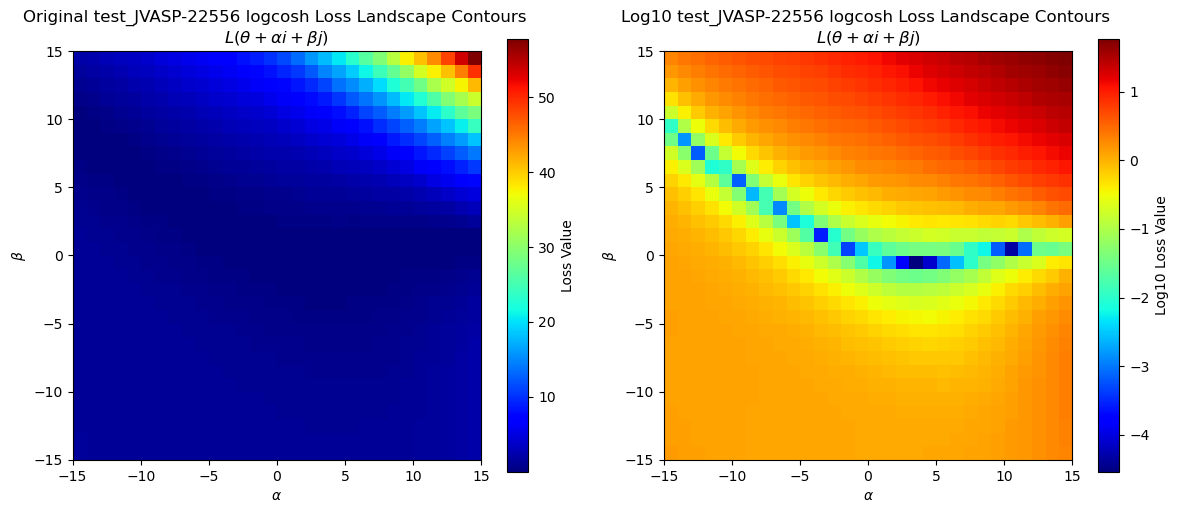

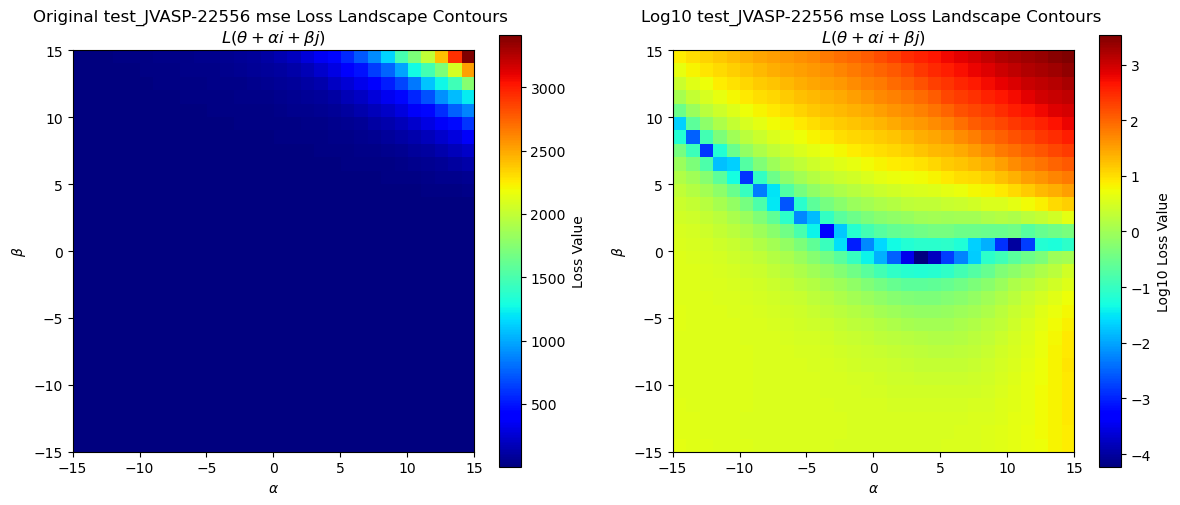

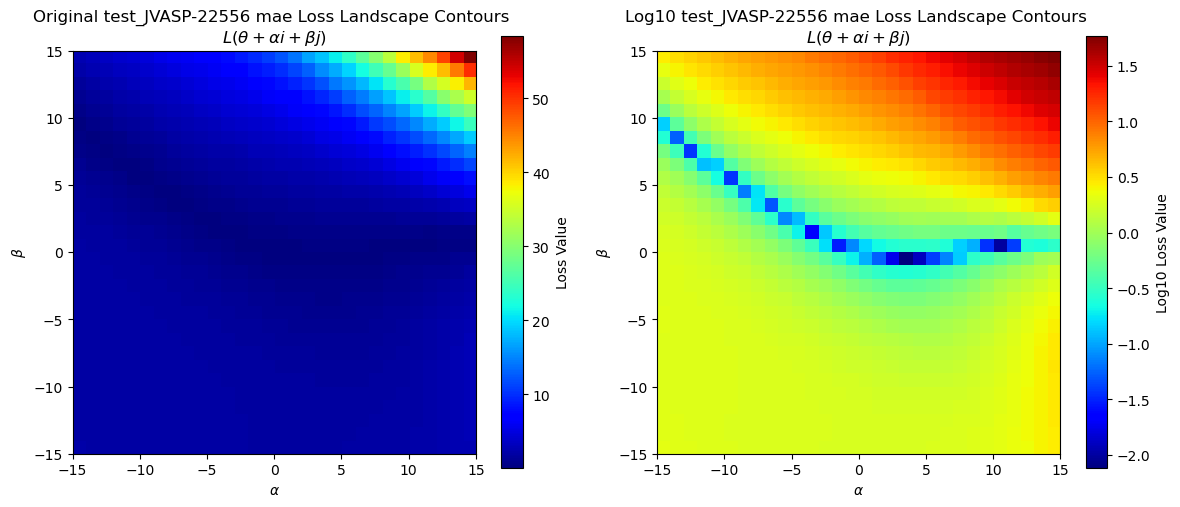

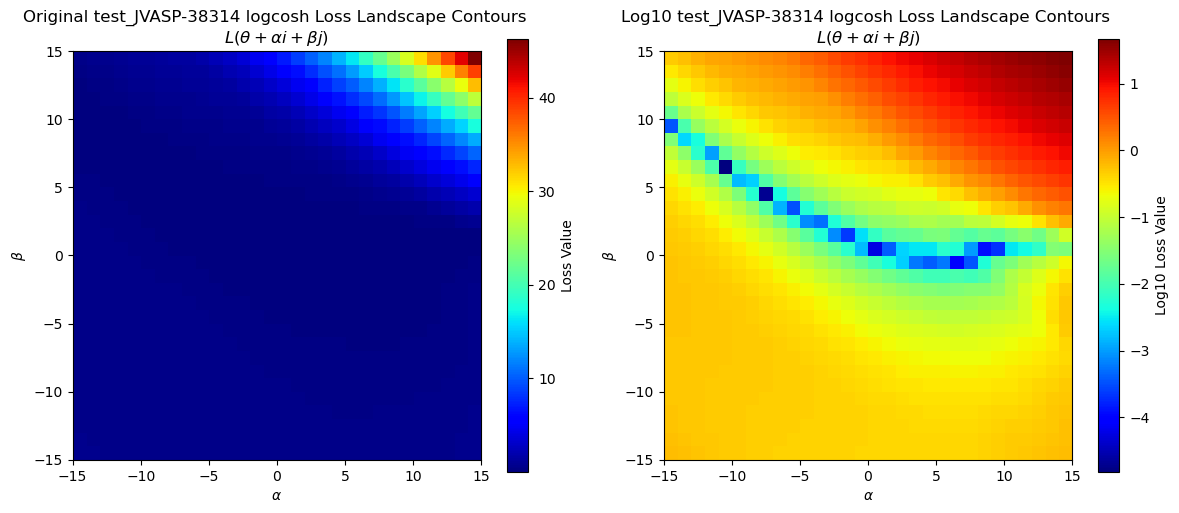

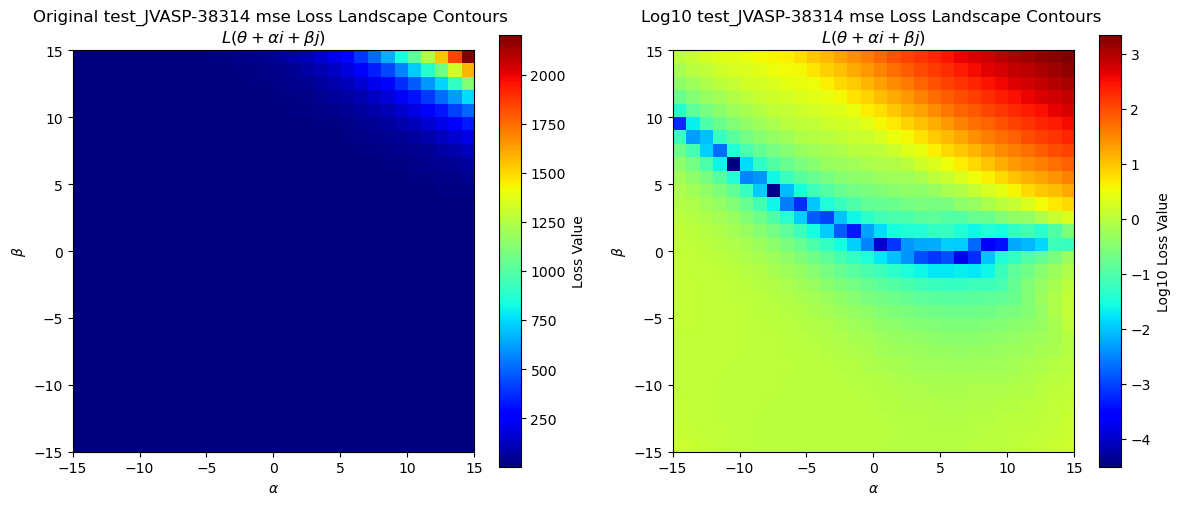

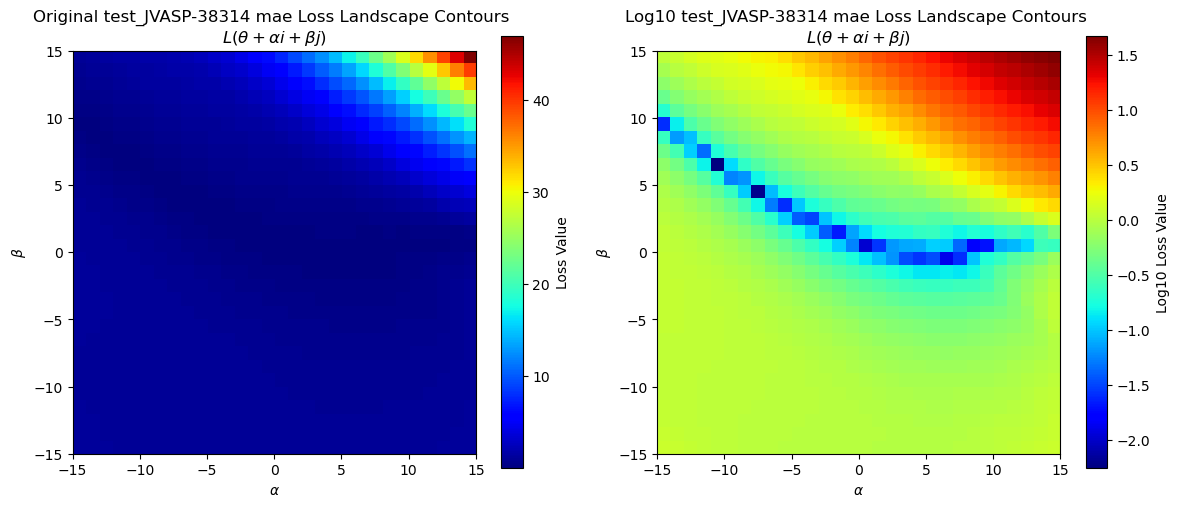

In [8]:

# Find the sample names corresponding to the frequent columns
frequent_sample_names = [sample_names[column] for column in frequent_columns_case_1_equals_3]

# Print the sample names
print("Sample names corresponding to frequent columns in case_1_equals_3_counts:")
print(frequent_sample_names)

loss_types = ['logcosh', 'mse', 'mae']

for sample_name in frequent_sample_names[:2]:
    for loss_type in loss_types:
        # Construct the file path to the loss landscape array
        loss_landscape_path = get_loss_landscape_path(loss_type, sample_name)
        
        # Load the loss landscape data
        data = np.load(loss_landscape_path)
        
        # Create a figure with two subplots for visualization
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        
        # Define the extent to adjust the coordinate system
        extent = [-15, data.shape[1] - 15, -15, data.shape[0] - 15]

        # Plot the original data contour
        ax[0].imshow(data[:, :, 0], cmap='jet', origin='lower', extent=extent)
        ax[0].set_title(f'Original {sample_name} {loss_type} Loss Landscape Contours \n'+ r'$L(\theta + \alpha i + \beta j$)')
        ax[0].set_xlabel(r'$\alpha$')
        ax[0].set_ylabel(r'$\beta$')
        plt.colorbar(ax[0].imshow(data[:, :, 0], cmap='jet', origin='lower', extent=extent), ax=ax[0], label='Loss Value')

        # Compute the log10 transformed data to avoid log(0) issues
        log_data = np.log10(data[:, :, 0] + 1e-10)

        # Plot the log10 transformed data contour
        ax[1].imshow(log_data, cmap='jet', origin='lower', extent=extent)
        ax[1].set_title(f'Log10 {sample_name} {loss_type} Loss Landscape Contours \n'+ r'$L(\theta + \alpha i + \beta j$)')
        ax[1].set_xlabel(r'$\alpha$')
        ax[1].set_ylabel(r'$\beta$')
        plt.colorbar(ax[1].imshow(log_data, cmap='jet', origin='lower', extent=extent), ax=ax[1], label='Log10 Loss Value')

        # Adjust layout for better visualization
        plt.tight_layout()
        plt.show()



Task 3: 
Apply unsupervised ML seperately, and check if the clusters are similar.

logcosh_landscapes flattened shape: (100, 900)
mse_landscapes flattened shape: (100, 900)
mae_landscapes flattened shape: (100, 900)
logcosh_landscapes standardized shape: (100, 900)
mse_landscapes standardized shape: (100, 900)
mae_landscapes standardized shape: (100, 900)


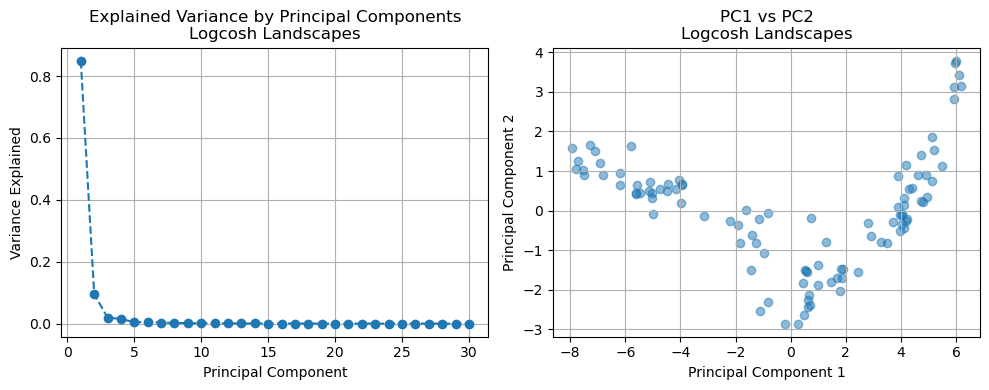

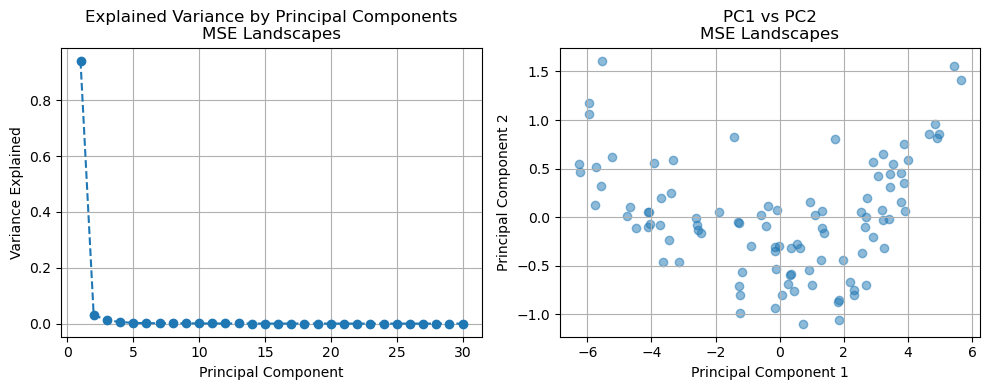

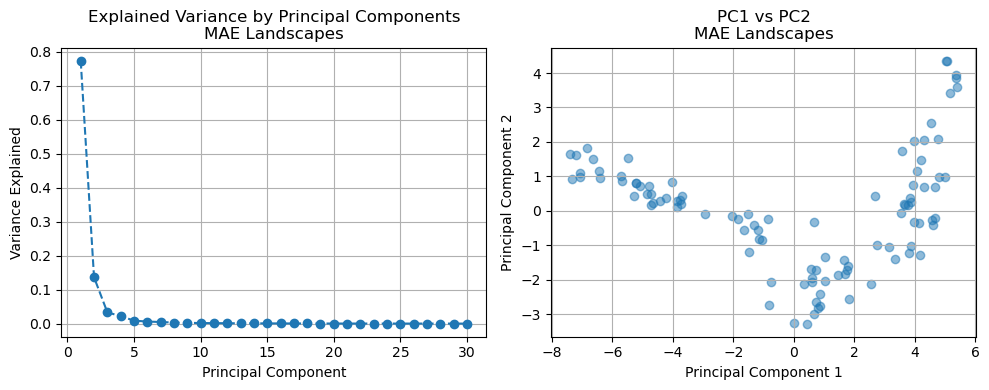

In [13]:

logcosh_landscapes_flat = logcosh_landscapes.reshape(logcosh_landscapes.shape[0], -1)
mse_landscapes_flat = mse_landscapes.reshape(mse_landscapes.shape[0], -1)
mae_landscapes_flat = mae_landscapes.reshape(mae_landscapes.shape[0], -1)

print("logcosh_landscapes flattened shape:", logcosh_landscapes_flat.shape)
print("mse_landscapes flattened shape:", mse_landscapes_flat.shape)
print("mae_landscapes flattened shape:", mae_landscapes_flat.shape)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize each flat array
logcosh_landscapes_standardized = scaler.fit_transform(logcosh_landscapes_flat.T).T
mse_landscapes_standardized = scaler.fit_transform(mse_landscapes_flat.T).T
mae_landscapes_standardized = scaler.fit_transform(mae_landscapes_flat.T).T

print("logcosh_landscapes standardized shape:", logcosh_landscapes_standardized.shape)
print("mse_landscapes standardized shape:", mse_landscapes_standardized.shape)
print("mae_landscapes standardized shape:", mae_landscapes_standardized.shape)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to apply PCA, visualize results, and return PCA object
def apply_pca_and_visualize(data, title):
    # Apply PCA
    pca = PCA(n_components=30)
    pca_result = pca.fit_transform(data)

    # Plot explained variance
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 31), pca.explained_variance_ratio_, marker='o', linestyle='--')
    plt.title(f'Explained Variance by Principal Components\n{title}')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.grid()

    # Plot PC1 vs PC2
    plt.subplot(1, 2, 2)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.title(f'PC1 vs PC2\n{title}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()

    plt.tight_layout()
    plt.show()
    
    return pca

# Apply PCA, visualize, and get PCA object for each dataset
pca_logcosh = apply_pca_and_visualize(logcosh_landscapes_standardized, 'Logcosh Landscapes')
pca_mse = apply_pca_and_visualize(mse_landscapes_standardized, 'MSE Landscapes')
pca_mae = apply_pca_and_visualize(mae_landscapes_standardized, 'MAE Landscapes')




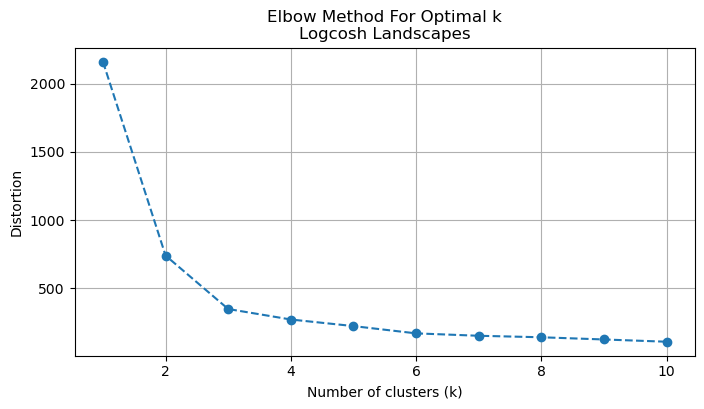

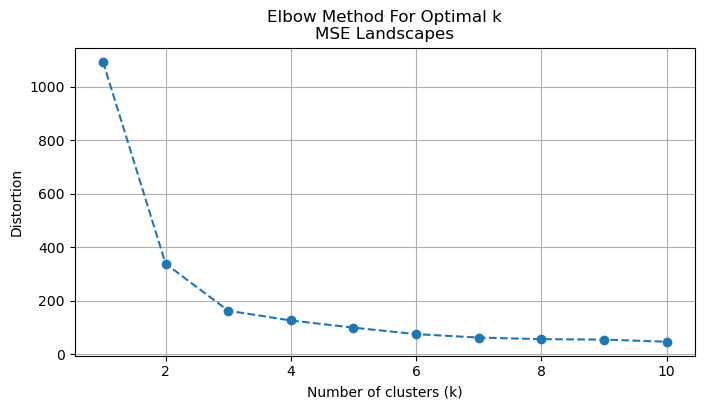

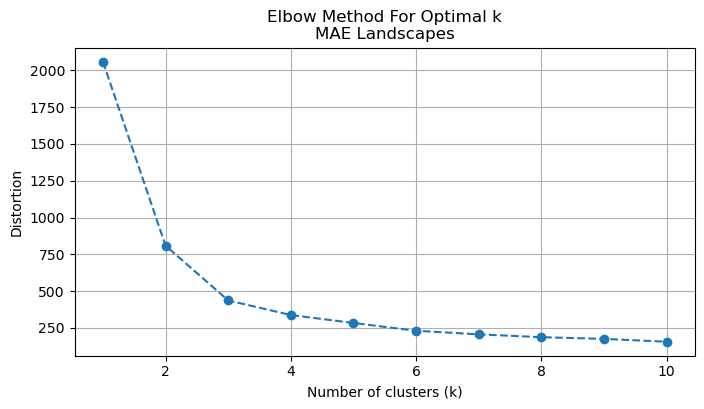

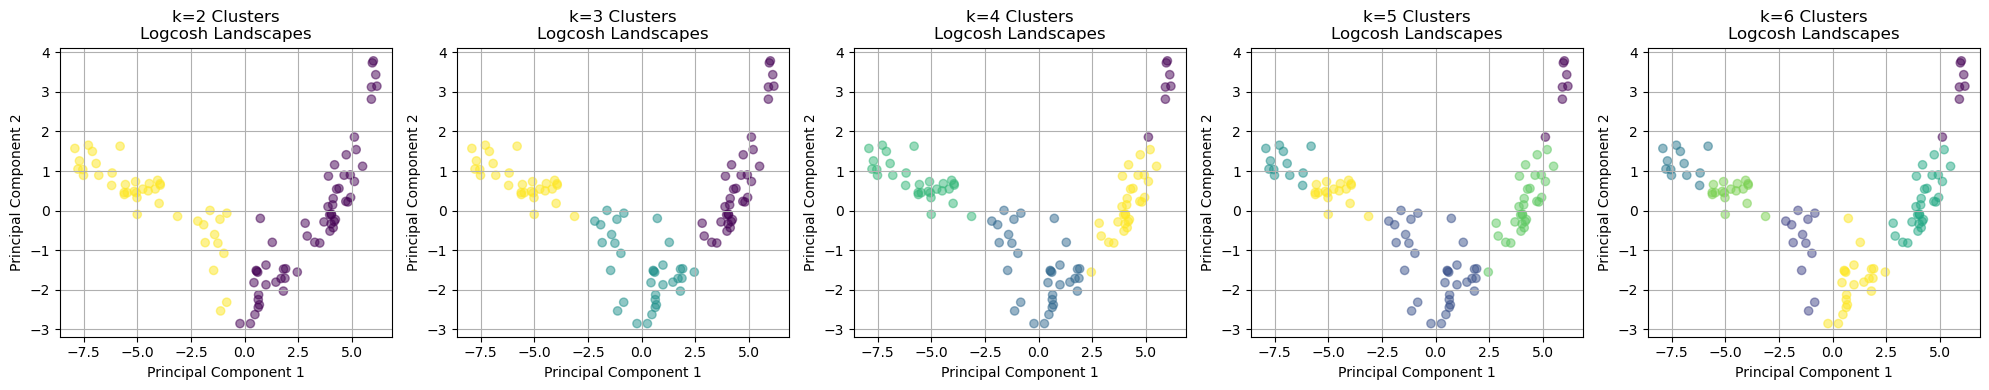

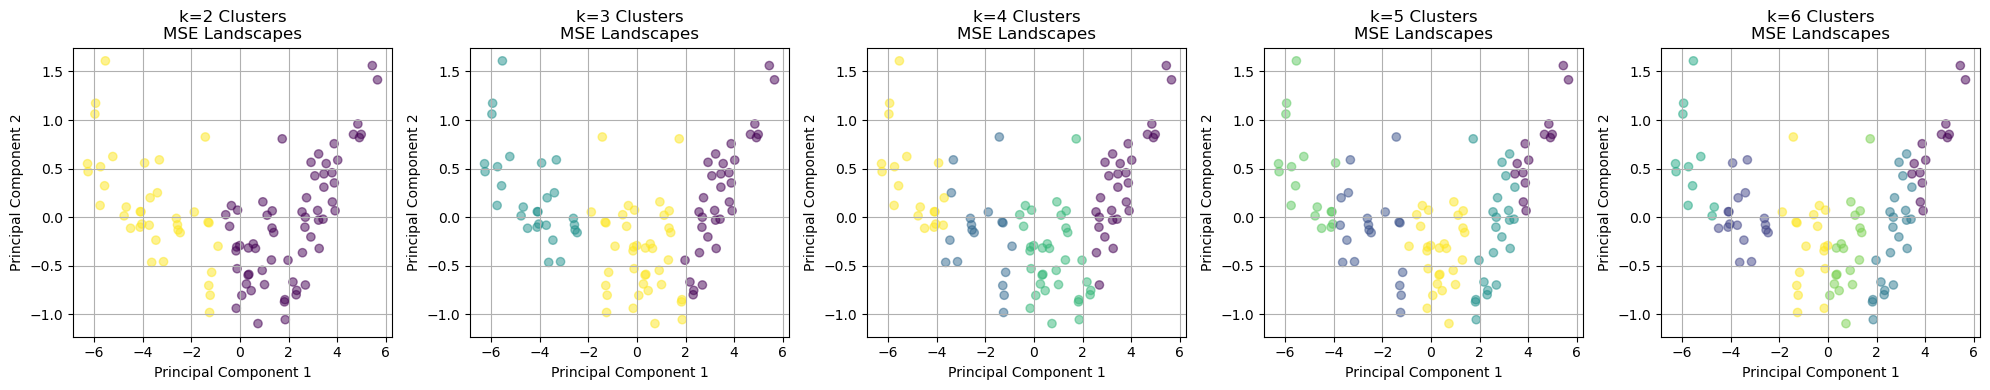

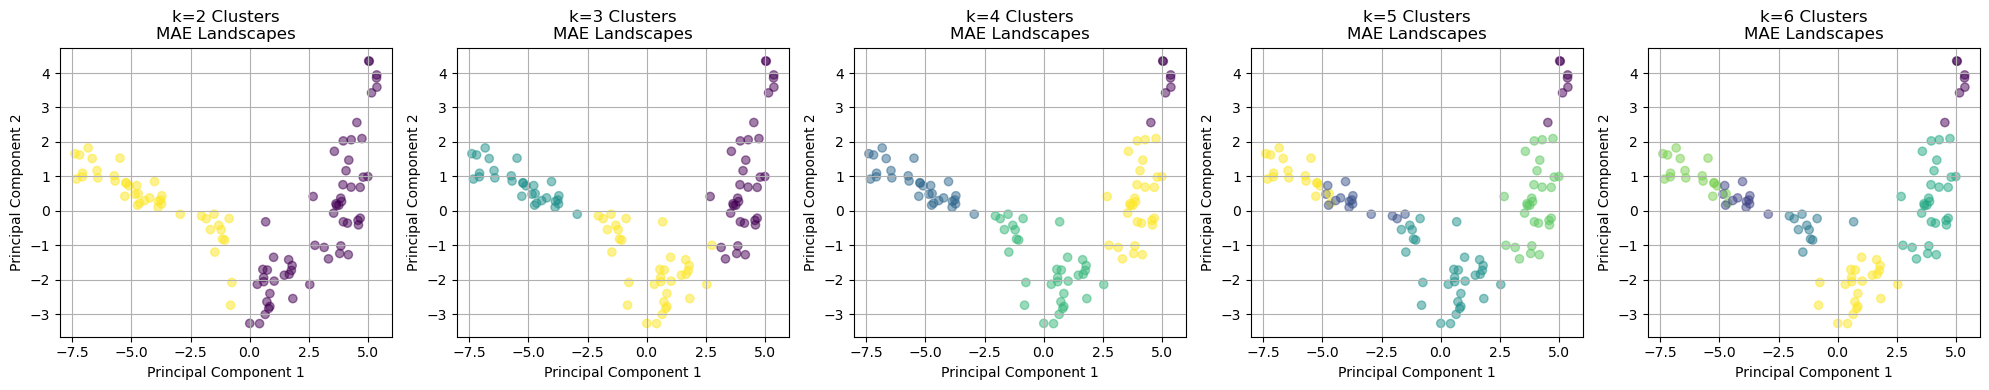

In [27]:
from sklearn.cluster import KMeans

# Function to apply KMeans and visualize elbow plot
def apply_kmeans_and_elbow_plot(data, title):
    distortions = []
    K = range(1, 11)  # You can adjust the range for k as needed
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plot the elbow
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, marker='o', linestyle='--')
    plt.title(f'Elbow Method For Optimal k\n{title}')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.grid()
    plt.show()

# Apply KMeans and visualize elbow plot for each dataset
apply_kmeans_and_elbow_plot(logcosh_landscapes_standardized, 'Logcosh Landscapes')
apply_kmeans_and_elbow_plot(mse_landscapes_standardized, 'MSE Landscapes')
apply_kmeans_and_elbow_plot(mae_landscapes_standardized, 'MAE Landscapes')

# Function to visualize KMeans clustering with k=2 to k=6 in PC space using PCA results for each dataset
def visualize_kmeans_k2_to_k6_with_pca(pca_result, data, title):
    # Define the range of k to visualize
    k_values = range(2, 7)
    
    # Create subplots
    fig, axes = plt.subplots(1, len(k_values), figsize=(20, 4), tight_layout=True)
    
    for ax, k in zip(axes, k_values):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        labels = kmeans.predict(data)
        
        # Visualize the result in PC space
        ax.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.5)
        ax.set_title(f'k={k} Clusters\n{title}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.grid()

    plt.show()

# Visualize KMeans with k=2 to k=6 using PCA results for each dataset
visualize_kmeans_k2_to_k6_with_pca(pca_logcosh.transform(logcosh_landscapes_standardized), logcosh_landscapes_standardized, 'Logcosh Landscapes')
visualize_kmeans_k2_to_k6_with_pca(pca_mse.transform(mse_landscapes_standardized), mse_landscapes_standardized, 'MSE Landscapes')
visualize_kmeans_k2_to_k6_with_pca(pca_mae.transform(mae_landscapes_standardized), mae_landscapes_standardized, 'MAE Landscapes')


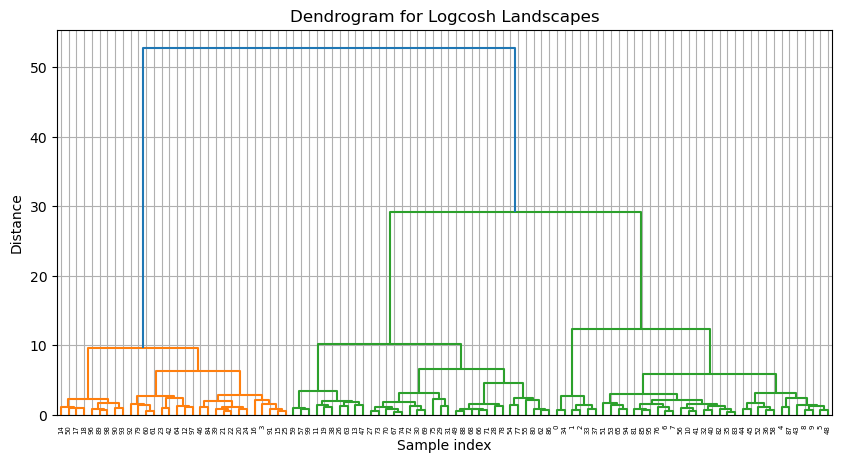

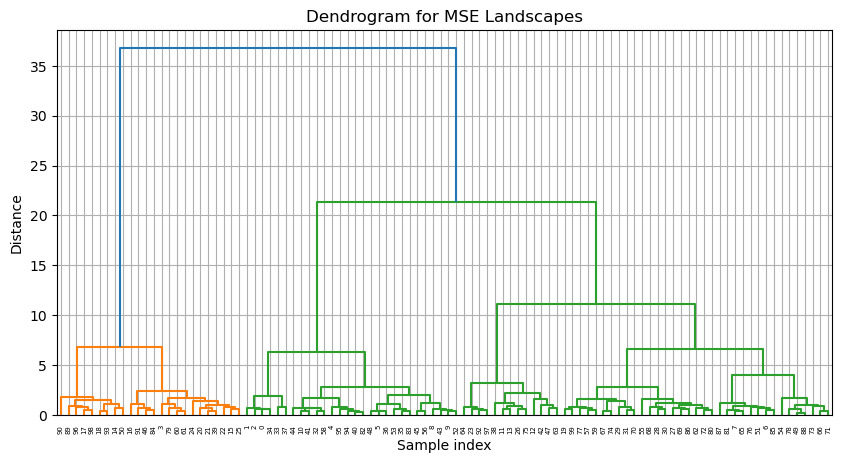

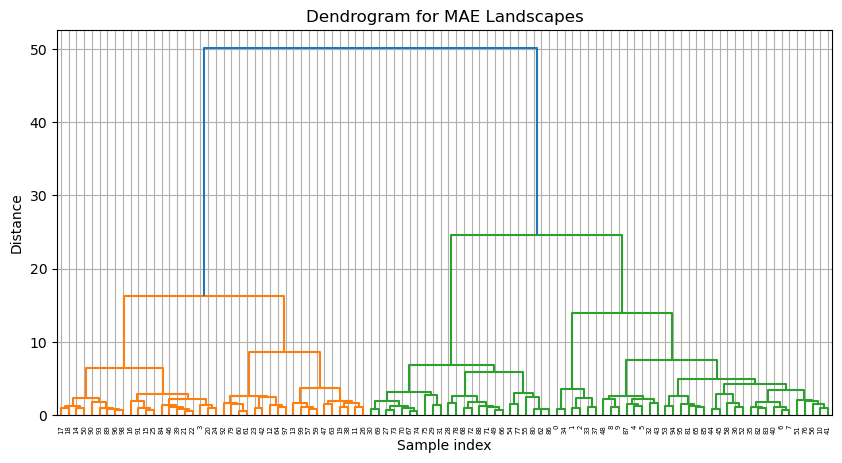

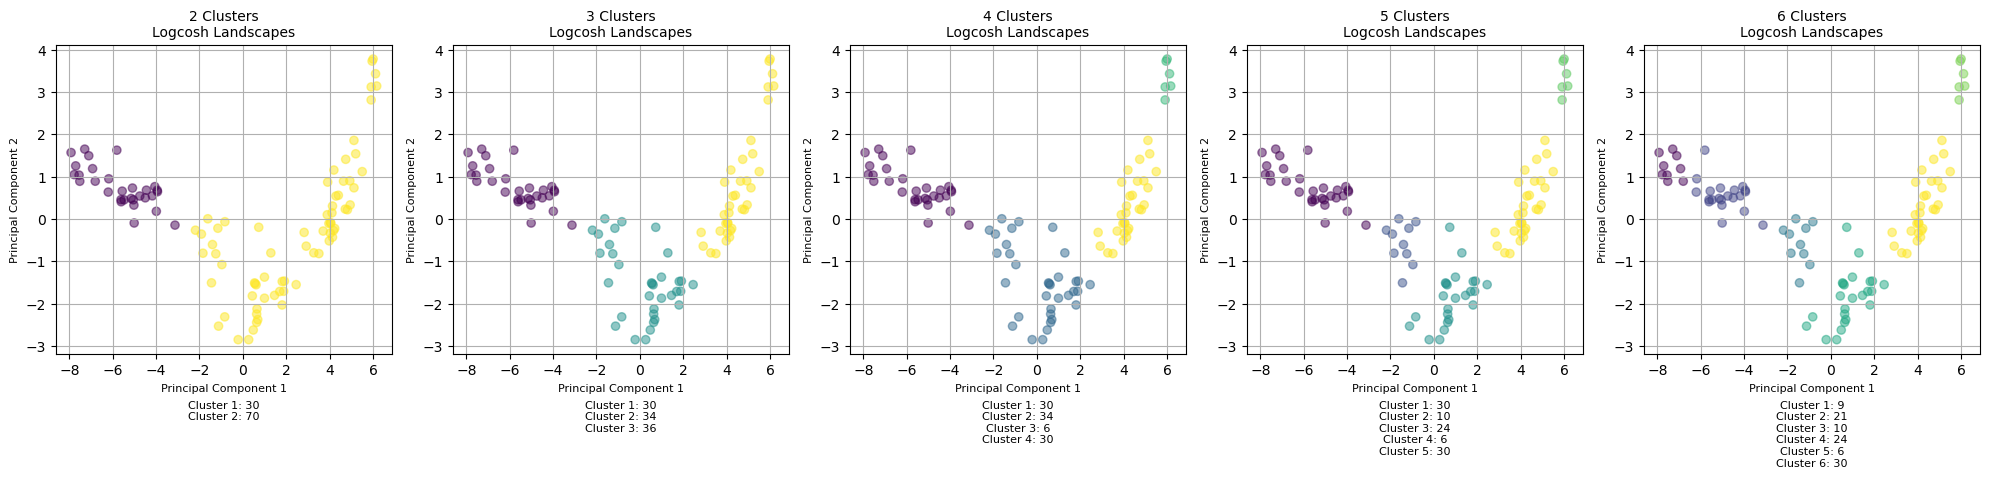

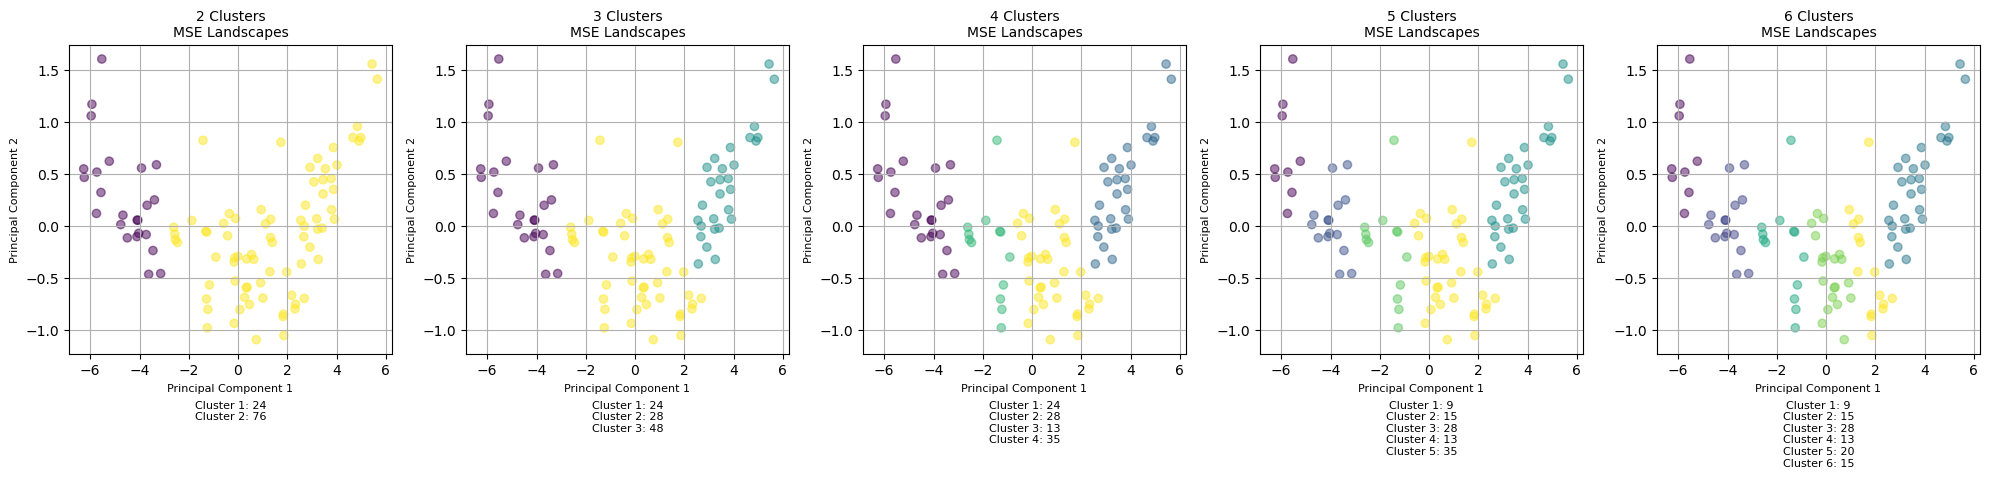

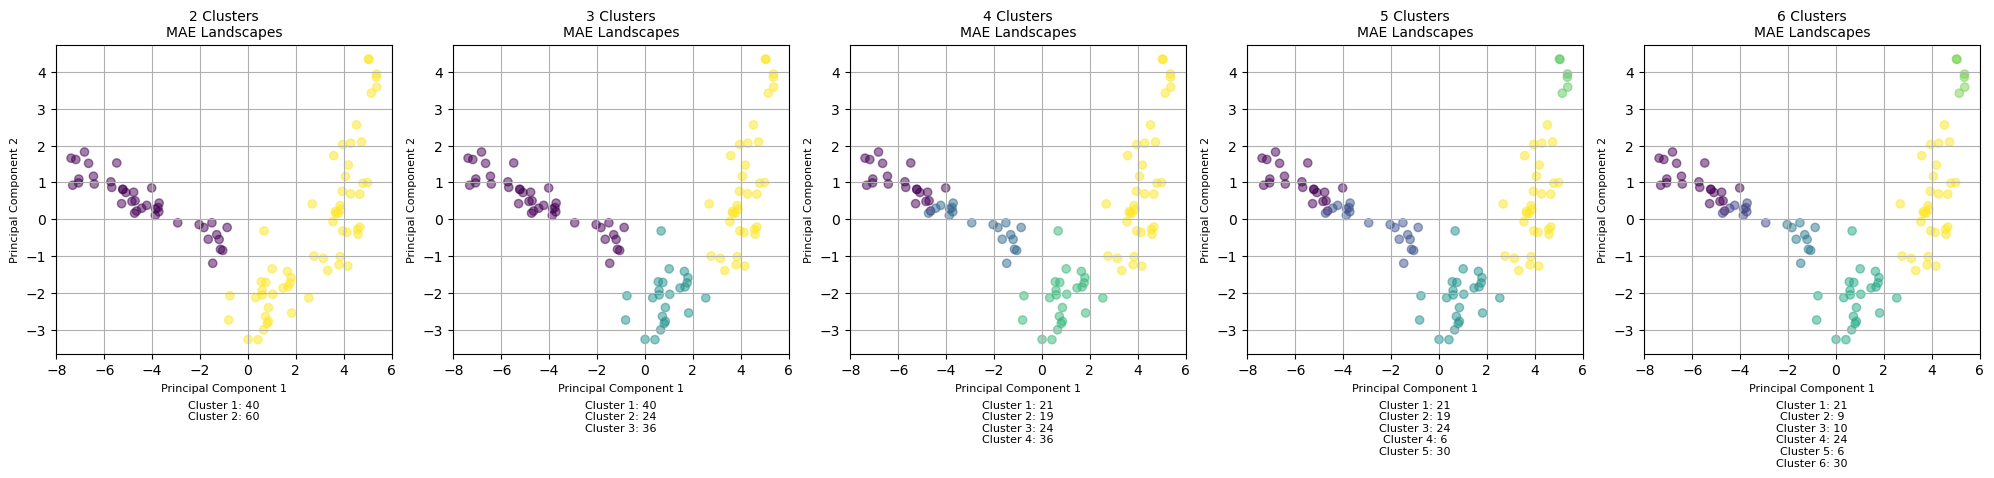

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Function to apply hierarchical clustering and visualize dendrogram
def apply_hierarchical_clustering_and_dendrogram(data, title):
    # Generate the linkage matrix
    Z = linkage(data, method='ward')
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(f'Dendrogram for {title}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.grid()
    plt.show()

# Apply hierarchical clustering and visualize dendrogram for each dataset
apply_hierarchical_clustering_and_dendrogram(logcosh_landscapes_standardized, 'Logcosh Landscapes')
apply_hierarchical_clustering_and_dendrogram(mse_landscapes_standardized, 'MSE Landscapes')
apply_hierarchical_clustering_and_dendrogram(mae_landscapes_standardized, 'MAE Landscapes')
from scipy.cluster.hierarchy import fcluster

# Function to visualize hierarchical clustering with different numbers of clusters in PC space
def visualize_hierarchical_clustering_with_pca(pca_result, data, title):
    # Generate the linkage matrix
    Z = linkage(data, method='ward')
    
    # Define the number of clusters to visualize
    num_clusters_list = [2, 3, 4, 5, 6]
    
    # Create subplots
    fig, axes = plt.subplots(1, len(num_clusters_list), figsize=(20, 5), tight_layout=True)
    
    for ax, num_clusters in zip(axes, num_clusters_list):
        # Cut the dendrogram to form flat clusters
        labels = fcluster(Z, num_clusters, criterion='maxclust')
        
        # Count the number of samples in each cluster
        unique_labels, counts = np.unique(labels, return_counts=True)
        cluster_info = '\n'.join([f'Cluster {label}: {count}' for label, count in zip(unique_labels, counts)])
        
        # Visualize the result in PC space
        ax.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.5)
        ax.set_title(f'{num_clusters} Clusters\n{title}', fontsize=10)
        ax.set_xlabel('Principal Component 1', fontsize=8)
        ax.set_ylabel('Principal Component 2', fontsize=8)
        ax.text(0.5, -0.15, cluster_info, fontsize=8, ha='center', va='top', transform=ax.transAxes)
        ax.grid()

    plt.show()

# Visualize hierarchical clustering with different numbers of clusters using PCA results for each dataset
visualize_hierarchical_clustering_with_pca(pca_logcosh.transform(logcosh_landscapes_standardized), logcosh_landscapes_standardized, 'Logcosh Landscapes')
visualize_hierarchical_clustering_with_pca(pca_mse.transform(mse_landscapes_standardized), mse_landscapes_standardized, 'MSE Landscapes')
visualize_hierarchical_clustering_with_pca(pca_mae.transform(mae_landscapes_standardized), mae_landscapes_standardized, 'MAE Landscapes')


Logcosh and mae loss landscapes have similar clusters and similar PCA projection whereas mse does not.

Todo:
1. Confirm that the clusters actually match up